In [1]:
# Download the test image and utils files
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
#     -O test.jpg
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
#     -O haarcascade_frontalface_default.xml
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
#     -O haarcascade_smile.xml
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
#     -O haarcascade_eye.xml
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
#     -O common.py

# Import the opencv library
import cv2

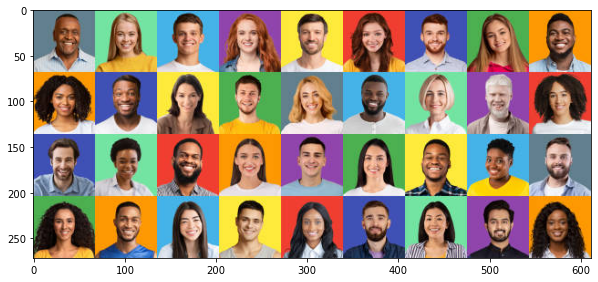

In [29]:
# these imports let you use opencv
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

# First convert our RGB images into gray scale to detect faces
base_image = cv2.imread('muchas_caras.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB));

In [30]:
# Create the Face Detector class
class FaceDetector:
    def __init__(self, faceCascadePath):
        """
        Calling the Cascade Classifier function in opencv to detect faces by taking the 
        haar cascade xml file as the argument (convert serialized xml file (classifier) into 
        deseralized classifier)
        """
        self.faceCascade = cv2.CascadeClassifier(faceCascadePath)
        
    def detect(self, image, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30)):
        rects = self.faceCascade.detectMultiScale(image,
                                                  scaleFactor=scaleFactor,
                                                  minNeighbors=minNeighbors,
                                                  minSize=minSize,
                                                  flags=cv2.CASCADE_SCALE_IMAGE)
        return rects

### Parameters used in the detectMultiScale function 
**scaleFactor**: How much the image size is reduced at each image scale. This value is used to create the scale pyramid in order to detect faces at multiple scales in the image (some faces may be closer to the foreground, and thus be larger; other faces may be smaller and in the background, thus the usage of varying scales). A value of 1.05 indicates that Jeremy is reducing the size of the image by 5% at each level in the pyramid.                                                                                      

**minNeighbors**: How many neighbors each window should have for the area in the window to be considered a face. The cascade classifier will detect multiple windows around a face. This parameter controls how many rectangles (neighbors) need to be detected for the window to be labeled a face.

**minSize**: A tuple of width and height (in pixels) indicating the minimum size of the window. Bounding boxes smaller than this size are ignored. It is a good idea to start with (30, 30) and fine-tune from there.

In [39]:
base_image = cv2.imread('muchas_caras.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
# plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB));

# Create a object for Face Detector class
fd = FaceDetector('haarcascade_frontalface_default.xml')
# Call the detect method
faceRects = fd.detect(grey, 
                      scaleFactor=1.4,
                      minNeighbors=3,
                      minSize=(30, 30))
print(f"I found {len(faceRects)} faces in the image")

I found 21 faces in the image


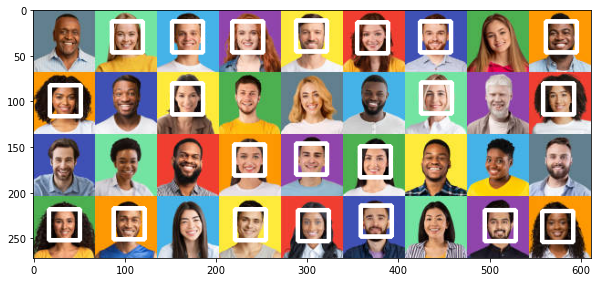

In [44]:
for (x, y, w, h) in faceRects:
    cv2.rectangle(base_image, (x, y), (x+w, y+h), (255, 255, 255), 3)
    
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB));

In [8]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)

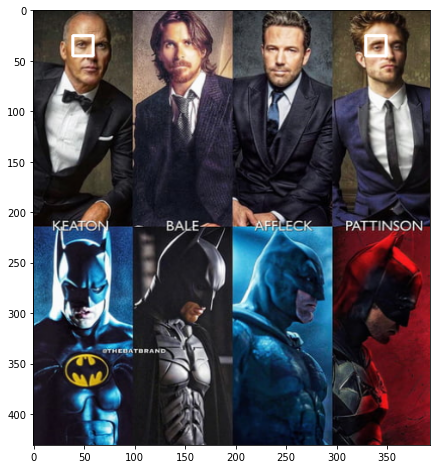

In [15]:
test_image = cv2.imread('batman.png')
for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB));

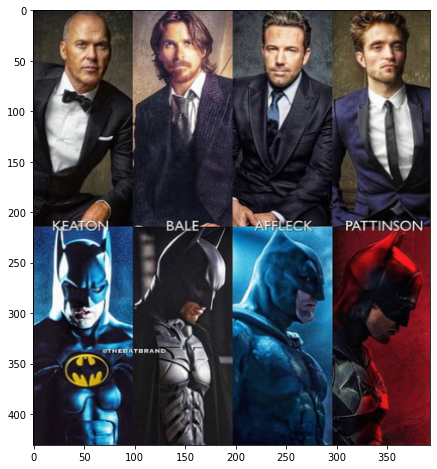

In [23]:
test_image = cv2.imread('batman.png')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

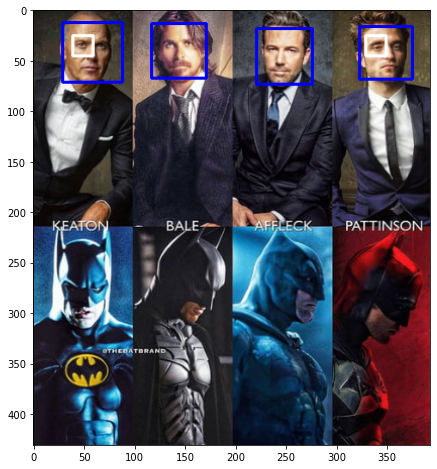

In [22]:
test_image = cv2.imread('batman.png')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

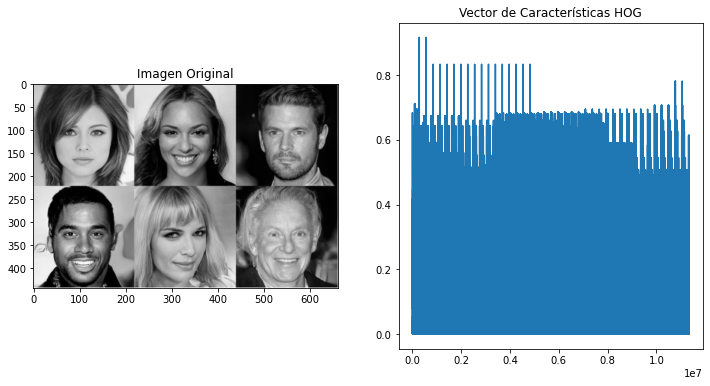

In [16]:
# Cargar la imagen
image = cv2.imread("caras.jpg", cv2.IMREAD_GRAYSCALE)

# Inicializar el descriptor HOG
hog = cv2.HOGDescriptor()

# Calcular HOG
features = hog.compute(image)

# Visualizar la imagen original y la imagen HOG
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(122)
plt.plot(features)  # Cambia a tu propia representación si es necesario
plt.title('Vector de Características HOG')

plt.show()

In [47]:
# !pip install cmake
import dlib
import cv2

#step2: converts to gray image

image = cv2.imread("muchas_caras.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#step3: get HOG face detector and faces
hogFaceDetector = dlib.get_frontal_face_detector()
faces = hogFaceDetector(image, 1)

#step4: loop through each face and draw a rect around it
for (i, rect) in enumerate(faces):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    #draw a rectangle
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
#step5: display the resulted image
cv2.imshow("Image", image)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [46]:
import dlib

#step1: Loads face detection model
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

#step2: loads the image
image = cv2.imread("caras.jpg")

#step3: converts to gray image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#step4: detect faces using CNN model
faces = cnn_face_detector(gray, 1)
for faceRect in faces:
    rect =  faceRect.rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    
    # step5: draw rectangle around each face
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

#step6: display the image
cv2.imshow("Image", image)
cv2.waitKey(0)

cv2.destroyAllWindows()